# Conhecendo a base de dados

## Importando os dados


In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados = pd.read_csv (url, sep=';')

In [3]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [4]:
dados.tail()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN
32959,Conjunto Comercial/Sala,Centro,0,0,0,250,6500.0,4206.0,1109.0


In [5]:
type(dados)

pandas.core.frame.DataFrame

## Características gerais da base de dados

In [6]:
dados.shape

(32960, 9)

In [7]:
dados.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [9]:
dados['Tipo']

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [10]:
dados[['Quartos', 'Valor']]

,Quartos,Valor
0,1,1700.0
1,2,7000.0
2,0,5200.0
3,1,800.0
4,1,800.0
...,...,...
32955,0,800.0
32956,3,1800.0
32957,2,1400.0
32958,2,3000.0


# Análise exploratória de dados

## Qual o valor médio de aluguel por tipo de imóvel?

In [11]:
# Calculamos o valor medio de todos os imóveis
valor_medio = dados['Valor'].mean()
print(f"O valor médio dos imóveis é de aproximadamente R$ {valor_medio:,.2f}")

O valor médio dos imóveis é de aproximadamente R$ 12,952.66


In [12]:
dados.groupby('Tipo').mean(numeric_only=True).round(2)

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
Tipo,,,,,,,
Apartamento,2.48,1.23,0.88,119.79,4744.61,1722.65,686.17
Box/Garagem,0.06,1.30,0.00,17.52,1899.76,305.45,125.85
Casa,3.13,1.80,1.26,250.58,6793.45,931.28,1582.51
Casa Comercial,1.56,2.20,0.26,372.24,14478.26,1935.71,1707.39
Casa de Condomínio,4.01,3.10,2.86,456.16,11952.06,1342.03,3252.52
Casa de Vila,1.93,0.39,0.23,78.47,1574.37,138.77,183.88
Chácara,3.00,0.00,0.00,0.00,4900.00,NaN,NaN
Conjunto Comercial/Sala,0.04,2.52,0.01,214.47,14715.05,4512.22,1399.60
Flat,1.42,0.96,0.75,65.48,4546.19,2027.72,493.17


In [13]:
# Calculando valor medio de cada tipo de imovel
valor_medio_tipo = dados.groupby('Tipo')[['Valor']].mean().round(2).sort_values(by='Valor')
print(valor_medio_tipo)

                                 Valor
Tipo                                  
Quitinete                      1246.84
Pousada/Chalé                  1480.00
Casa de Vila                   1574.37
Box/Garagem                    1899.76
Studio                         2400.00
Loft                           2557.88
Flat                           4546.19
Apartamento                    4744.61
Chácara                        4900.00
Casa                           6793.45
Loja Shopping/ Ct Comercial    8126.18
Casa de Condomínio            11952.06
Sítio                         12499.00
Loja/Salão                    13769.65
Casa Comercial                14478.26
Conjunto Comercial/Sala       14715.05
Loteamento/Condomínio         22000.00
Hotel                         25000.00
Terreno Padrão                32567.71
Galpão/Depósito/Armazém       53407.06
Indústria                    120000.00
Prédio Inteiro               498637.24


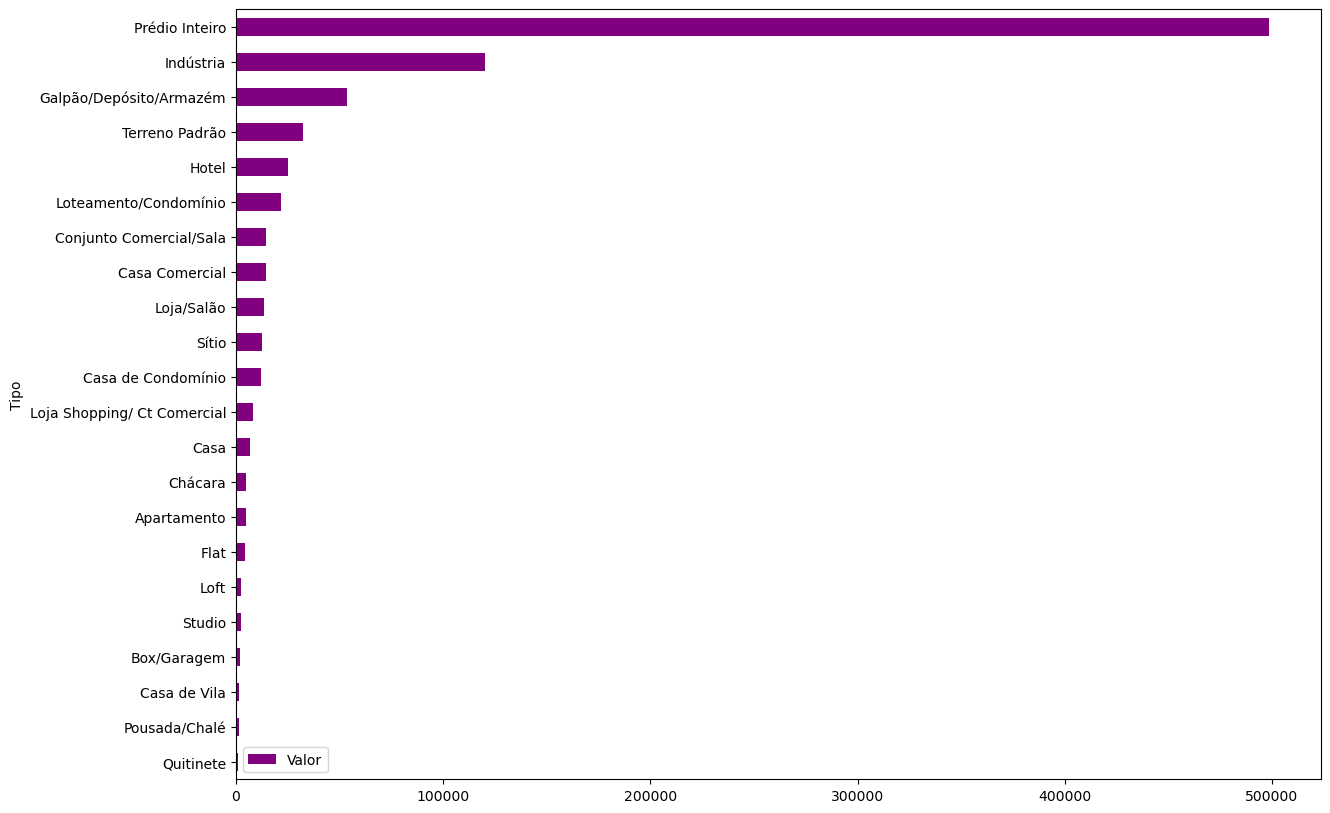

In [14]:
# Exibe o valor médio por tipo de imóvel, com os dados ordenados e plotados em gráfico de barras horizontais
valor_medio_tipo = dados.groupby('Tipo')[['Valor']].mean().round(2).sort_values(by='Valor')
valor_medio_tipo.plot(kind='barh', figsize=(14, 10), color='purple');

## Removendo os imóveis comerciais

In [15]:
# Registros da coluna Tipo
dados.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [16]:
# Lista de registros que devem ser removidos da coluna Tipo
imoveis_comerciais = ['Conjunto Comercial/Sala',
                      'Prédio Inteiro', 'Loja/Salão',
                      'Galpão/Depósito/Armazém',
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']


In [17]:
# Iremos ultilizar o método '.query' para selecionar apenas os registros que estão na lista
dados.query('@imoveis_comerciais in Tipo')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0
16,Prédio Inteiro,Botafogo,0,0,0,536,28000.0,NaN,3563.0
26,Conjunto Comercial/Sala,São Cristóvão,0,1,0,25,1100.0,600.0,NaN
29,Loja/Salão,Campo Grande,0,1,0,35,1300.0,950.0,NaN
...,...,...,...,...,...,...,...,...,...
32942,Conjunto Comercial/Sala,Barra da Tijuca,0,1,0,55,2000.0,1096.0,NaN
32946,Conjunto Comercial/Sala,Centro,0,0,0,140,4000.0,1412.0,496.0
32948,Conjunto Comercial/Sala,Centro,0,0,0,32,600.0,1035.0,83.0
32954,Box/Garagem,Centro,0,0,0,755,14000.0,NaN,NaN


In [18]:
# Deixar apenas os imoveis residenciais
dados.query('@imoveis_comerciais not in Tipo')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


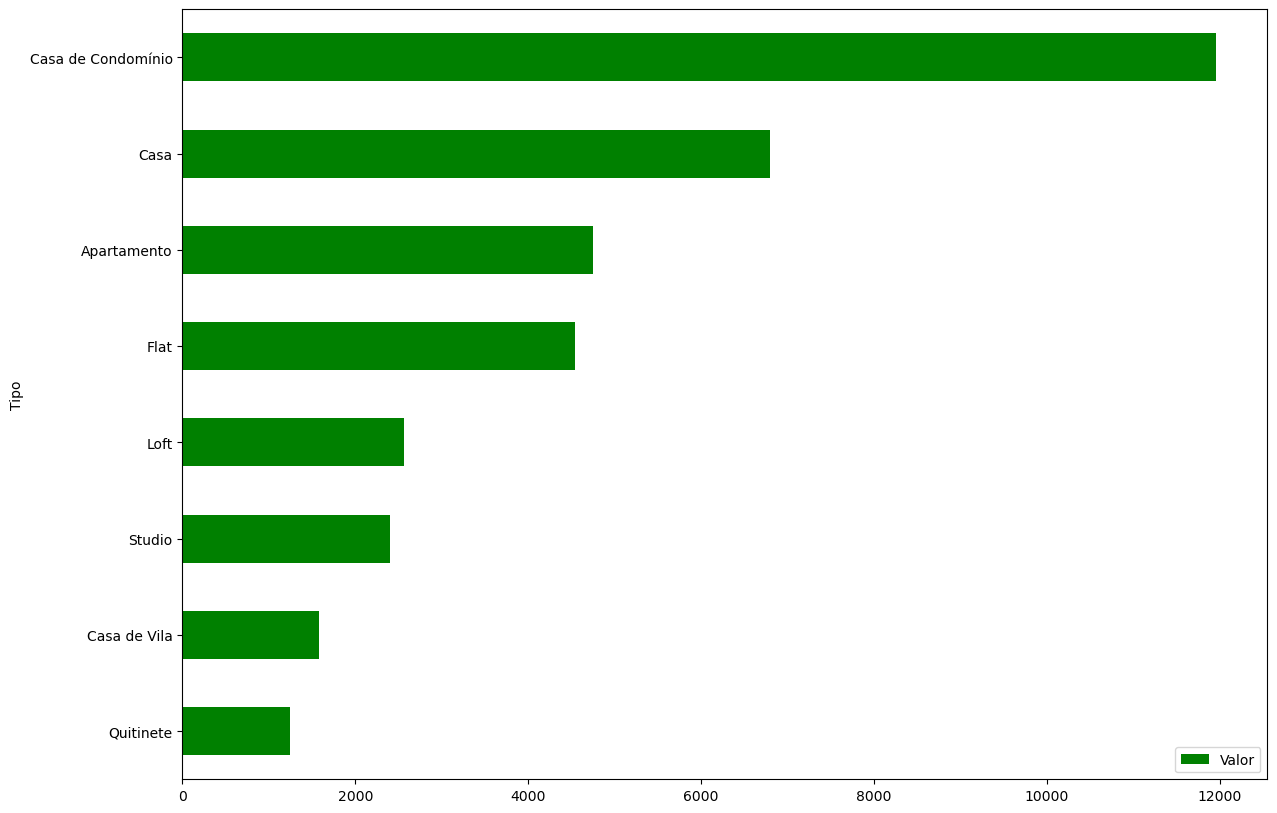

In [19]:
# Valor médio por tipo, excluindo imóveis comerciais, exibido em gráfico de barras.
df = dados.query('@imoveis_comerciais not in Tipo')
df_preco_tipo = df.groupby('Tipo')[['Valor']].mean().sort_values('Valor')
df_preco_tipo.plot(kind='barh', figsize=(14, 10), color='Green');

## Qual o percentual de cada tipo de imóvel na nossa base de dados?

In [20]:
df.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

In [21]:
df.Tipo.value_counts(normalize=True).to_frame().sort_values('Tipo')

,proportion
Tipo,
Apartamento,0.845139
Casa,0.041842
Casa de Condomínio,0.043096
Casa de Vila,0.010774
Flat,0.020596
Loft,0.002207
Quitinete,0.036173
Studio,0.000173


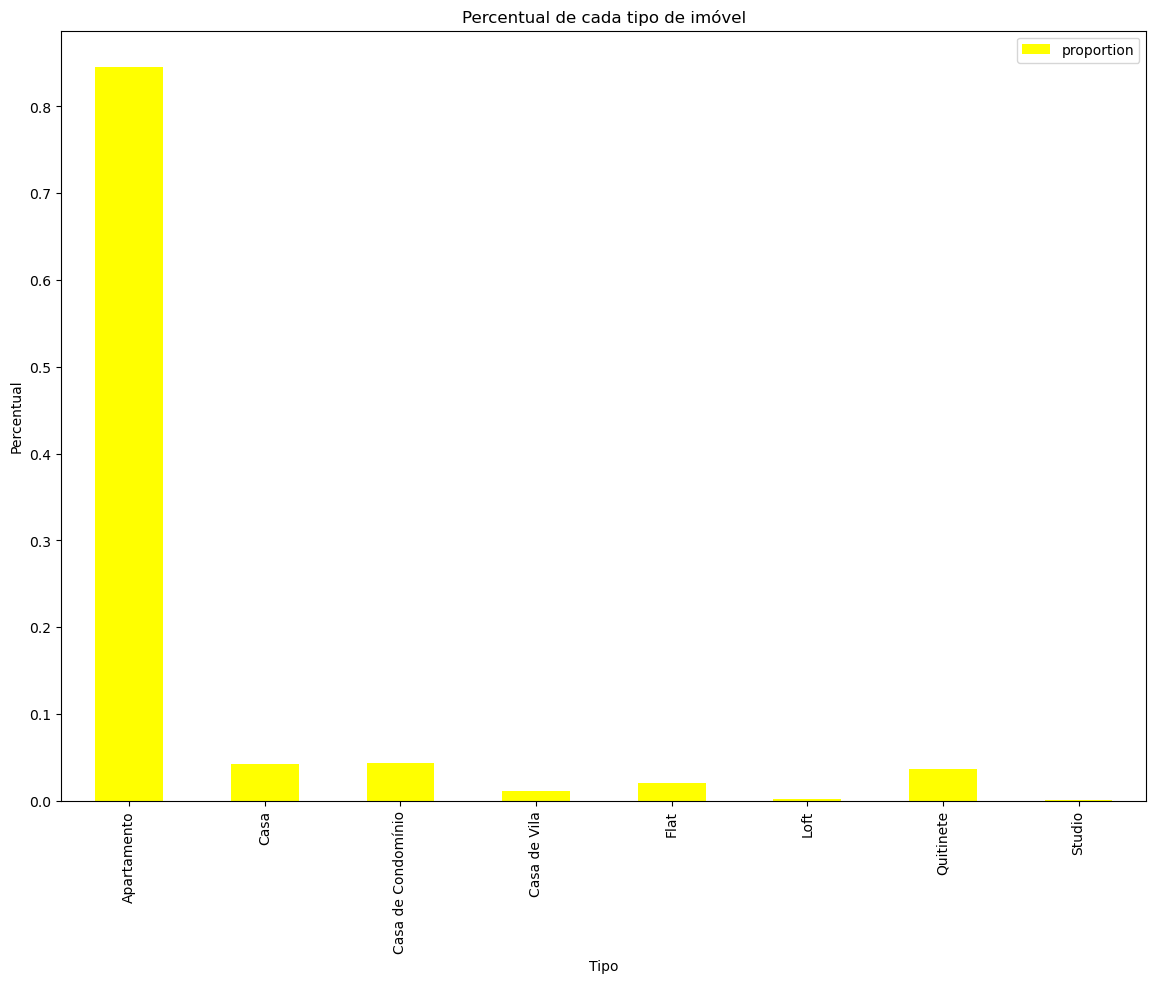

In [22]:
df_percentual_tipo = df.Tipo.value_counts(normalize=True).to_frame().sort_values('Tipo')
df_percentual_tipo.plot (kind = 'bar', figsize = (14, 10), color = 'yellow',
                           xlabel = 'Tipo', ylabel = 'Percentual', title = 'Percentual de cada tipo de imóvel');

### **Selecionando apenas os imóveis do tipo apartamento**

In [23]:
df_apartamento = df.query('Tipo == "Apartamento"')
df_apartamento.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


# Tratando e filtrando os dados

## Lidando com dados nulos

In [24]:
# Contagem de valores nulos por coluna.
df_apartamento.isnull().sum()

Tipo             0
Bairro           0
Quartos          0
Vagas            0
Suites           0
Area             0
Valor            7
Condominio     745
IPTU          5472
dtype: int64

In [25]:
# Preenche valores nulos com zero.
df_apartamento.fillna(0)

# Contagem de valores nulos por coluna.
df_apartamento.isnull().sum()

Tipo             0
Bairro           0
Quartos          0
Vagas            0
Suites           0
Area             0
Valor            7
Condominio     745
IPTU          5472
dtype: int64

## Removendo registros

In [26]:
df_apartamento.query('Valor == 0 | Condominio == 0').index

Index([], dtype='int64')

In [43]:
registros_remover = df_apartamento.query('Valor == 0 | Condominio == 0').index
df_apartamento.drop(registros_remover, axis=0)
df_apartamento.query('Valor == 0 | Condominio == 0')

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


## Filtros

### **1. Apartamentos que possuem `1 quarto` e `aluguel menor que 1200`**



In [45]:
df_apartamento['Quartos'] == 1

3         True
4         True
5        False
6        False
10        True
         ...  
32951    False
32953    False
32956    False
32957    False
32958    False
Name: Quartos, Length: 19532, dtype: bool

In [46]:
selecao1 = df_apartamento['Quartos'] == 1
df_apartamento[selecao1]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,NaN
10,Centro,1,0,0,36,1200.0,NaN,NaN
13,Copacabana,1,0,1,40,2000.0,561.0,50.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
...,...,...,...,...,...,...,...,...
32918,Ipanema,1,0,0,55,2000.0,630.0,19.0
32922,Barra da Tijuca,1,1,0,62,1700.0,945.0,180.0
32935,Leblon,1,1,1,50,4300.0,1730.0,259.0
32938,Copacabana,1,0,0,50,1950.0,450.0,70.0


In [47]:
selecao2 = df_apartamento['Valor'] < 1200
df_apartamento[selecao2]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,NaN
19,Freguesia (Jacarepaguá),3,0,0,54,950.0,300.0,28.0
23,Olaria,3,1,0,68,1000.0,670.0,NaN
28,Tijuca,1,0,0,48,750.0,772.0,25.0
...,...,...,...,...,...,...,...,...
32925,Campinho,2,0,0,63,800.0,392.0,NaN
32930,Freguesia (Jacarepaguá),2,1,0,60,500.0,900.0,148.0
32950,Tijuca,1,0,0,28,1000.0,360.0,25.0
32951,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN


In [48]:
selecao_final = selecao1 & selecao2
df_1 = df_apartamento[selecao_final]
df_1

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,NaN
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
94,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...
32627,Glória,1,0,0,46,1100.0,453.0,32.0
32643,Guadalupe,1,0,0,40,550.0,NaN,NaN
32666,Bonsucesso,1,0,0,60,1000.0,NaN,NaN
32714,Botafogo,1,0,0,21,1000.0,282.0,25.0


### **2. Apartamentos que possuem pelo menos `2 quartos`, `aluguel menor que 3000` e `area maior que 70`**

In [49]:
selecao = (df_apartamento['Quartos'] >= 2) & (df_apartamento['Valor'] < 3000) & (df_apartamento['Area'] > 70)
df_2 = df_apartamento[selecao]
df_2

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
21,Tijuca,2,1,0,110,1900.0,700.0,138.0
24,Tijuca,2,1,0,78,2000.0,700.0,NaN
32,Botafogo,2,1,0,76,2500.0,740.0,NaN
36,Recreio dos Bandeirantes,3,1,1,105,2300.0,648.0,NaN
...,...,...,...,...,...,...,...,...
32934,Jacarepaguá,2,1,1,78,2200.0,790.0,180.0
32940,Barra da Tijuca,2,1,1,85,2250.0,1561.0,197.0
32941,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.0
32944,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,NaN


## Salvando os dados

In [50]:
df_apartamento.to_csv('dados_apartamento.csv', index=False, sep=';', )

In [51]:
pd.read_csv('dados_apartamento.csv', sep=';')

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,NaN
2,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
3,Cachambi,2,0,0,50,1300.0,301.0,17.0
4,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...
19527,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
19528,Méier,2,0,0,70,900.0,490.0,48.0
19529,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
19530,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


# Manipulando os dados

## Criando colunas numéricas

In [52]:
import pandas as pd
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados = pd.read_csv (url, sep=';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [53]:
dados['Valor_por_mes'] = dados['Valor'] + dados['Condominio']
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0


In [54]:
dados['Valor_por_ano'] = dados['Valor_por_mes'] * 12 + dados['IPTU']
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN


## Criando colunas categóricas

In [55]:
dados['Descricao'] = dados['Tipo'] + ' em ' + dados['Bairro']
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa em Jardim Botânico
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento em Higienópolis


In [56]:
dados['Descricao'] = dados['Tipo'] + ' em ' + dados['Bairro'] + ' com ' + \
                                        dados['Quartos'].astype(str) + ' quarto(s) ' + \
                                        ' e ' + dados['Vagas'].astype(str) + ' vaga(s) de garagem.'
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 v...
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa em Jardim Botânico com 2 quarto(s) e 0 v...
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 0 vag...
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento em Higienópolis com 1 quarto(s) e...


In [57]:
dados['Possui_suite'] = dados['Suites'].apply(lambda x: 'Sim' if x > 0 else 'Não')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao,Possui_suite
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 v...,Não
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa em Jardim Botânico com 2 quarto(s) e 0 v...,Sim
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...,Não
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 0 vag...,Não
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento em Higienópolis com 1 quarto(s) e...,Não


In [58]:
dados.to_csv('dados_completos_dev.csv', index=False, sep=';')